In [1]:
# YOUR CODE HERE
import numpy as np

from tqdm.auto import trange

import torch as th
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from torch.utils.data import DataLoader, SubsetRandomSampler
# import torch.optim as optim

import torchvision
from torchvision import datasets, transforms


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

/home/pettepiero/local/envs/atml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing dataset

In [2]:

train_dataset = datasets.FashionMNIST(
    root="./data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = datasets.FashionMNIST(
    root="./data",
    train=False,
    transform=transforms.ToTensor,
    download=True
)

train_loader = DataLoader(dataset = train_dataset,
                          batch_size = len(train_dataset),
                          shuffle = False)

test_loader = DataLoader(dataset = test_dataset,
                          batch_size = len(test_dataset),
                          shuffle = False)

In [3]:
# def imshow(img) -> None:
#     npimg = img.numpy()
#     plt.axis("off")
#     plt.imshow(np.transpose(npimg, axes=(1, 2, 0)))

# dataiter = train_loader.__iter__()
# images, labels = dataiter.__next__()

# # Show images
# imshow(torchvision.utils.make_grid(images))

In [4]:
subset_size = 10000

idx = th.randperm(len(train_dataset))[:subset_size]

sampler = SubsetRandomSampler(idx)

train_subset_loader = DataLoader(train_dataset, sampler=sampler)

In [5]:
labels_subset = []
train_subset = []
for batch in train_subset_loader:
    data, labels = batch
    
    train_subset.append(data.numpy().reshape(1, -1))
    labels_subset.append(labels.numpy())

train_subset = np.array(train_subset).reshape(subset_size, -1)
labels_subset = np.array(labels_subset)


In [6]:
# Creating dictionary of labels for better understanding
description = {0: "T-shirt/top", 
               1: "Trouser", 
               2: "Pullover", 
               3: "Dress", 
               4: "Coat", 
               5: "Sandal", 
               6: "Shirt", 
               7: "Sneaker", 
               8: "Bag", 
               9: "Ankle boot"}


## Section 1
### 1: perform linear PCA

(10000, 784)


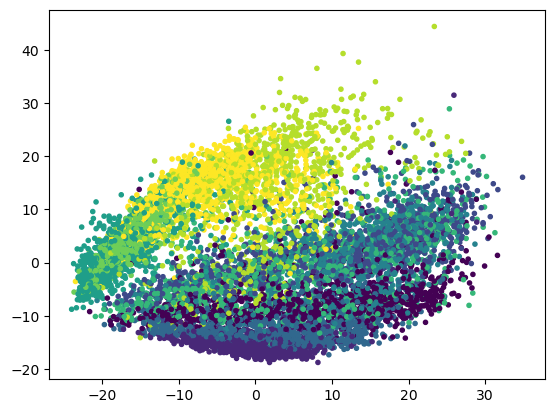

In [12]:
scaler = StandardScaler()
train_subset_scaled = scaler.fit_transform(train_subset)

model = PCA() ## Do parameter tunong if you have time

data_pca = model.fit_transform(train_subset_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = labels_subset, marker='.')

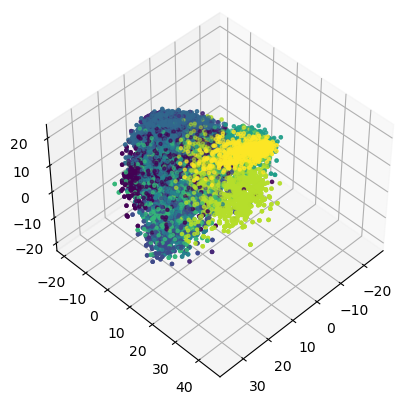

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color the data points based on the labels
for i in range(3):
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c = labels_subset, marker='.')

ax.view_init(elev=45, azim=45)

### Perform kernel PCA

In [9]:
kernel_pca = KernelPCA(kernel="rbf", n_components=3)

data_pca_kernel = kernel_pca.fit_transform(train_subset_scaled)
print(type(data_pca_kernel))

<class 'numpy.ndarray'>


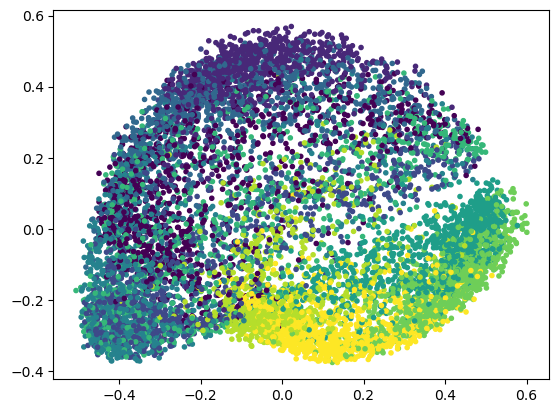

In [10]:
plt.scatter(data_pca_kernel[:, 0], data_pca_kernel[:, 1], c = labels_subset, marker='.')

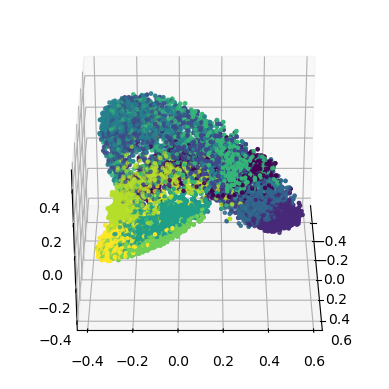

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color the data points based on the labels
for i in range(3):
    ax.scatter(data_pca_kernel[:, 0], data_pca_kernel[:, 1], data_pca_kernel[:, 2], c = labels_subset, marker='.')

ax.view_init(elev=30, azim=0)